In [1]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [2]:
#import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("/content/Churn_Modelling.csv")

In [4]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#Divide datataset into dependent and independent features
#notation of iloc is in the format "dataset.iloc[row_indexing, column_indexing]"

X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [8]:
#Feature Engineering

#for one hot encoding we use "pd.get_dummies" functionality
#"drop_first = True" will be used to drop one column and for getting its value we will see that other two are "0"
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [9]:
geography

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True
...,...,...
9995,False,False
9996,False,False
9997,False,False
9998,True,False


In [10]:
#concatenate the variables with dataframe

X = X.drop(['Geography','Gender'],axis=1)


In [11]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [12]:
#concat function concatenates different dataframes
#"axis=1" is used to specify that columns are updated and no operation is performed on rows

X = pd.concat([X,geography,gender],axis=1)

In [13]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [14]:
#Splitting dataset into training and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [17]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [18]:
X_train.shape

(8000, 11)

In [19]:
X_test.shape

(2000, 11)

In [20]:
#Lets create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout


In [21]:
#initialization if ANN
classifier = Sequential()

In [22]:
#Add input layers
classifier.add(Dense(units=11, activation = 'relu'))

In [23]:
#add first hidden layer
classifier.add(Dense(units=7, activation = 'relu'))
classifier.add(Dropout(0.3))

In [24]:
#add second hidden layer
classifier.add(Dense(units=6, activation = 'relu'))
classifier.add(Dropout(0.2))

In [25]:
#Add output layer
#using sigmoid activation function for binary classification
classifier.add(Dense(units=1, activation = 'sigmoid'))

In [26]:
#in place of default value we can also setup learning rate value by following method

import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [27]:
classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
#Early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [29]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
model_history = classifier.fit(X_train, y_train, validation_split= 0.33, batch_size = 10, epochs = 1000, callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.7732 - loss: 0.5013 - val_accuracy: 0.8179 - val_loss: 0.4189
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8170 - loss: 0.4383 - val_accuracy: 0.8402 - val_loss: 0.3783
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8382 - loss: 0.3929 - val_accuracy: 0.8307 - val_loss: 0.3861
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8332 - loss: 0.3877 - val_accuracy: 0.8364 - val_loss: 0.3782
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8404 - loss: 0.3739 - val_accuracy: 0.8425 - val_loss: 0.3755
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8476 - loss: 0.3726 - val_accuracy: 0.8410 - val_loss: 0.3786
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8491 - loss: 0.3644 - val_accuracy: 0.8247 - val_loss: 0.3877
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8356 - loss: 0.3931 

In [31]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

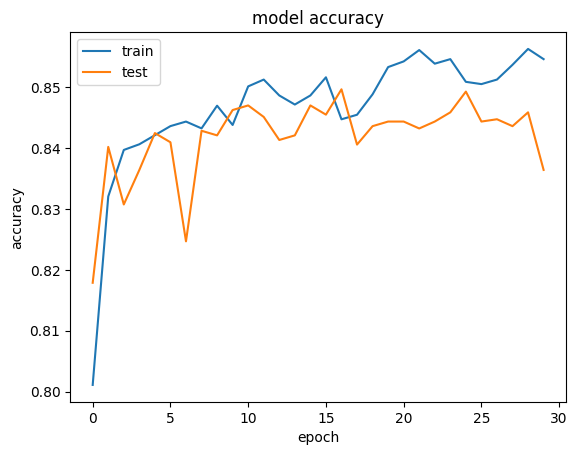

In [32]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

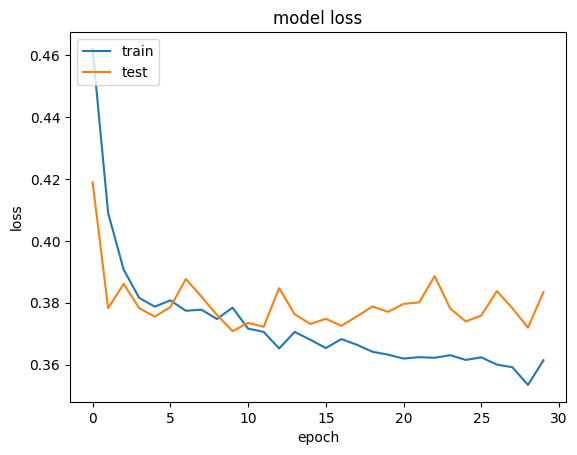

In [33]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [34]:
#prediction for test data
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [36]:
cm

array([[1581,   14],
       [ 292,  113]])

In [37]:
#Calculate accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)

In [38]:
score

0.847

In [39]:
#get the weights
classifier.get_weights()

[array([[ 0.3117455 , -0.43887752, -0.19496651, -0.51328516,  0.24417485,
         -0.25272742, -0.15095627,  1.3572325 , -0.46974397,  0.33311582,
         -0.18312229],
        [ 0.4597744 ,  1.1941556 ,  1.5242792 , -3.30695   , -1.5248245 ,
          0.3142785 , -0.06780308, -2.542     ,  0.19360884, -0.8443355 ,
         -2.460826  ],
        [-0.02438939, -0.26399168,  0.34045038, -0.5578236 ,  0.6170603 ,
          0.19778666, -0.6308087 , -0.25119206,  0.48879072,  0.5854715 ,
          0.46723092],
        [-0.40749657, -0.19401097, -1.5744327 ,  0.6637424 , -2.3324487 ,
          0.70321065,  0.908821  , -0.9718317 , -2.953726  , -0.99046075,
         -0.2750526 ],
        [-2.6396961 , -0.44331598, -0.02476387,  0.07267617,  0.03223471,
          3.1364741 , -1.0708296 , -0.9945591 , -2.9760685 ,  0.21020935,
         -0.11266582],
        [-0.71495014, -0.48847362,  0.03319559, -0.7451774 , -1.1661962 ,
          0.12915291,  0.18910584, -0.09960502,  0.07820296,  0.8641658